## Using features extracted from intensity profiles

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def plot_pca(pca_df, x_index=0, y_index=1, data=''):
    fig, ax = plt.subplots(figsize=(6, 6))
    # Define color and marker mapping
    if data == 'experiment': # plaques 1-8
        marker_map = {
            range(0, 20): ('*', 'black'),
            range(20, 34): ('o', 'blue'),
            range(34, 49): ('<', 'green'),
            range(49, 73): ('D', 'red'),
            range(73, 86): ('X', 'cyan'),
            range(86, 94): ('s', 'magenta'),
            range(94, 117): ('^', 'gray'),
            range(117, len(scaled_data)): ('p', 'purple')
        }
        round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
    elif data == 'toy-similar': # similar toy data
        marker_map = {
            range(0, 10): ('*', 'black'),
            range(10, 20): ('o', 'blue'),
            range(20, 30): ('<', 'green'),
            range(30, 40): ('D', 'red')
        }
        round_one_cells = [0, 10, 20, 30]
    elif data =='toy-dissimilar': # dissimilar toy data
        marker_map = {
            range(0, 11): ('*', 'black'),
            range(11, 24): ('o', 'blue'),
            range(24, 31): ('<', 'green'),
            range(31, 37): ('D', 'red'),
            range(37, 47): ('X', 'cyan'),
            range(47, 56): ('s', 'magenta'),
        }
        round_one_cells = [0, 11, 24, 31, 37, 47]

    legend_scatter = []
    legend_labels = []

    # Scatter plot with markers and colors based on the marker map
    for i, (index_range, (marker, color)) in enumerate(marker_map.items()):
        indices = index_range
        ax.scatter(pca_data[indices, x_index], pca_data[indices, y_index], marker=marker, c=color, s=50, alpha=0.75)
        legend_scatter.append(ax.scatter([], [], marker=marker, c=color, label=f'Plaque {i+1}'))
        legend_labels.append(f'Plaque {i+1}')

    for round_one_cell in round_one_cells:
        ax.scatter(pca_data[round_one_cell, x_index], pca_data[round_one_cell, y_index], s=100, facecolors='none', edgecolors='k')
        ax.annotate(f'P{round_one_cells.index(round_one_cell)+1}C1',
                    (pca_data[round_one_cell, x_index], pca_data[round_one_cell, y_index]),
                    ha='center', va='top', size='medium')

    ax.set_xlabel(f'PC {x_index+1}')
    ax.set_ylabel(f'PC {y_index+1}')
    plt.tight_layout()
    plt.legend()
    plt.show()

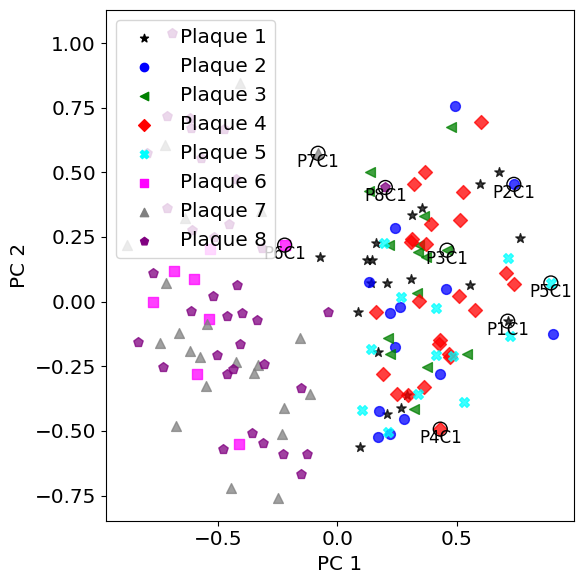

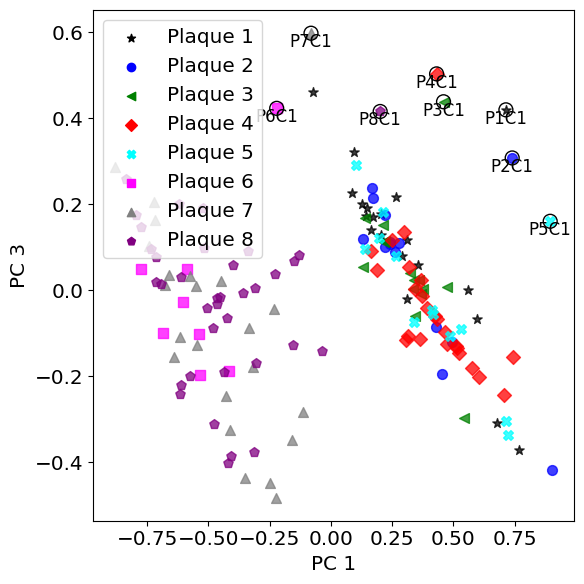

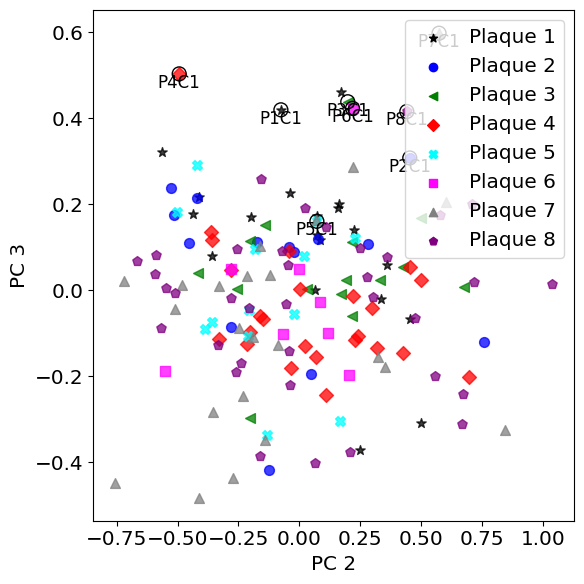

In [ ]:
file_name = 'experimental data - attributes.xlsx'
sheet_name = 'all plaques'
n_rows = 153
data = 'experiment'

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# data = 'toy-dissimilar'

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
n_components = 7
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
legend_annotations = 'A - Area\nB - Infection time\nC - GFP max\nD - Infection duration\nE - Lysis time\nF - Rise rate\nG - Rise time'

scaled_data = StandardScaler().fit_transform(attributes_df)
#pd.DataFrame(scaled_data, columns=attributes_df.columns)

pca = KernelPCA(n_components=n_components, kernel="sigmoid", gamma=0.14, fit_inverse_transform=True, alpha=1)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=columns)

plot_pca(pca_data, x_index=0, y_index=1, data=data)
plot_pca(pca_data, x_index=0, y_index=2, data=data)
plot_pca(pca_data, x_index=1, y_index=2, data=data)